<a href="https://colab.research.google.com/github/MaggieHDez/AIProject/blob/main/proyecto_MCHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**

## Nombre del Proyecto: Explorando Indicadores de Salud: BMI, Glucosa e Insulina
>Grupo: B\
>Autor: Margarita Cristina Hernández Delgadillo\
>Matrícula: 255879\
>Fecha: 03/11/2025

## **1. Introducción**

### Descripción del problema: ¿Qué queremos analizar o predecir?

En este proyecto se busca analizar el comportamiento del BMI, la glucosa en ayunas y los niveles de insulina en la muestra, detectando posibles outliers, diferencias entre géneros y grupos etarios, y la relación entre estas variables.

### Objetivo del análisis: ¿Qué impacto tendrá este análisis?

 El objetivo es clasificar y entender mejor la salud metabólica de la población estudiada, por ejemplo, ver en qué categorías se ubica el BMI y cómo se relaciona con otras variables. Esto nos ayudará a tener una base para análisis futuros y posibles acciones para mejorar la salud.

### Fuente de datos: ¿De dónde provienen los datos?

Los datos utilizados provienen de un archivo CSV que contiene registros de diversas personas, incluyendo información sobre su BMI, niveles de glucosa en ayunas y niveles de insulina.
#### Dataset
```
willian oliveira gibin, and Pooria Mostafapoor. (2025). Age National [Data set].
Kaggle. https://doi.org/10.34740/KAGGLE/DSV/10587919
```

Además de este Dataset, se utilizó el DataSet de la CDC para el cálculo del BMI de niños de 2 a 19 años, esto para poder clasificar el BMI correctamente
```
Selected percentiles and z-scores with LMS and sigma parameters [CSV – 122 KB], CDC,
https://www.cdc.gov/growthcharts/extended-bmi-data-files.htm
```

## **2. Captura y Carga de Datos**

### Explicación de la fuente de datos: ¿Cuáles son las fuentes de datos?, ¿Qué formato tienen los datos (CSV, SQL, API, etc.)?, ¿Cuántas observaciones y variables contiene el dataset?
Como se mencionó anteriomente el dataset se extrajo de
```
willian oliveira gibin, and Pooria Mostafapoor. (2025). Age National [Data set].
Kaggle. https://doi.org/10.34740/KAGGLE/DSV/10587919
```
El cual es un archivo tipo CSV con las siguiente información técnica:
```
- Columnas: 11
- Filas: 2278
- Variables:
  - Integer: 6
  - String: 2
  - Decimal: 2
  - Otras: 1
```

También el dataset `Selected percentiles and z-scores with LMS and sigma parameters` de la CDC se extrajo de
```
https://www.cdc.gov/growthcharts/extended-bmi-data-files.htm
```
Se está usando este dataset porque incluye los puntos de referencia oficiales de la CDC para el BMI en niños. Esto significa que, gracias a estos datos, podemos comparar el BMI de cada niño con una gran base de datos de niños de la misma edad y sexo. Así, sabemos si un niño está por debajo o por encima de lo "normal" (por ejemplo, en el percentil 5, 85 o 95), lo que nos ayuda a clasificarlo como bajo peso, saludable, sobrepeso u obesidad.

### Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (bibiotecas, etc.)

Estaré utilizando `pandas` para la lectura del archivo, la creación y manejo de DataFrames y para hacer operaciones de filtrado, limpieza, transformación y análisis estadístico, `matplotlib.pyplot` y `seaborn` para generar diagramas (como histogramas, boxplots y gráficos de dispersión) que ayudarán a visualizar la distribución de los datos y las relaciones entre las variables, facilitando la interpretación de los resultados.

Se cargaron los datos con `pd.read_csv()` y se revisaron las primeras 5 filas con `df.head()`. De esta forma se pudo confirmar que las columnas se leen correctamente y se identificó la estructura general del dataset. Por ejemplo, se observa información sobre ID, grupo de edad, edad, género, Body Mass Index (BMI), glucosa en ayunas, niveles de insulina y otras variables.

Con `df.shape` se determinó para el dataset `Age National` que el número de observaciones (filas) es 2278, y de las variables (columnas) es 11. Para `Selected percentiles and z-scores with LMS and sigma parameters` el número de oservaciones es 438 y de variables, 35.

In [ ]:
# Conexión a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
path = '/content/drive/MyDrive/ClassFiles/proyecto/Age National  body blood new.csv'
df= pd.read_csv(path)

# Mostrar las primeras filas para ver cómo se ven los datos
print("Primeras 5 filas del dataset:")
print(df.head())

# Número de observaciones (filas) y variables (columnas)
num_observaciones, num_variables = df.shape
print("\nNúmero de observaciones:", num_observaciones)
print("Número de variables:", num_variables)

Primeras 5 filas del dataset:
      ID Age_group  Age  Gender  PAQ605 Body Mass Index  \
0  73680  children   12       1       2              18   
1  74130  children   12       1       2            14,5   
2  74614  children   12       2       2            21,4   
3  74658  children   12       2       2            20,3   
4  74691  children   12       2       2            15,7   

   Blood Glucose after fasting  Diabetic or not  Respondent's Oral  \
0                           96                2                 83   
1                           85                2                 91   
2                           95                2                111   
3                           98                2                107   
4                           91                2                 94   

  Blood Insulin Levels percentage Body/Blood  
0                 10,8               166,67%  
1                10,86               133,52%  
2                15,56               137,53%  
3     

In [ ]:
# Cargar el dataset de la CDC
path_cdc = '/content/drive/MyDrive/ClassFiles/proyecto/bmi-age-2022.csv'
df_cdc= pd.read_csv(path_cdc)

# Mostrar las primeras filas para ver cómo se ven los datos
print("Primeras 5 filas del dataset:")
print(df_cdc.head())

# Número de observaciones (filas) y variables (columnas)
num_observaciones_cdc, num_variables_cdc = df_cdc.shape
print("\nNúmero de observaciones:", num_observaciones_cdc)
print("Número de variables:", num_variables_cdc)

Primeras 5 filas del dataset:
   sex  agemos         L          M         S     sigma       P3       P5  \
0    1    24.0 -2.011181  16.575028  0.080592  1.375600  14.5210  14.7373   
1    1    24.5 -1.982374  16.547775  0.080127  1.395718  14.5035  14.7193   
2    1    25.5 -1.924100  16.494428  0.079234  1.435858  14.4688  14.6836   
3    1    26.5 -1.865498  16.442596  0.078389  1.475872  14.4346  14.6484   
4    1    27.5 -1.807262  16.392243  0.077594  1.515759  14.4008  14.6138   

       P10      P25  ...     Z0_5       Z1     Z1_5       Z2     Z2_5  \
0  15.0903  15.7416  ...  17.2864  18.0984  19.0374  20.3657  21.4529   
1  15.0712  15.7196  ...  17.2532  18.0566  18.9829  20.3216  21.4247   
2  15.0334  15.6763  ...  17.1883  17.9751  18.8775  20.2374  21.3722   
3  14.9962  15.6340  ...  17.1256  17.8968  18.7767  20.1583  21.3247   
4  14.9597  15.5927  ...  17.0650  17.8216  18.6805  20.0843  21.2822   

        Z3     Z3_5       Z4     Z4_5       Z5  
0  22.3802  23.2312

## 3. Transformación y Preprocesamiento - Data Wrangling

### Identificación de Tipos de Datos

Con `df.info()` se determinó que el dataset cuenta con **2278 observaciones** y **11 variables**. Entre estas columnas se encuentran:
- **ID**: Identificador único (`int64`).
- **Age_group**: Grupo etario (`object`).
- **Age**: Edad (`int64`).
- **Género**: 1 representa masculino y 2 femenino (`int64`).
- **PAQ605**: Variable que representa la actividad laboral vigorosa, donde 1 es Sí, 2 No, 7 se negó a responder y 9 no sabe (`int64`).
- **Body Mass Index**: Índice de masa corporal, almacenado como tipo `object`.
- **Blood Glucose after fasting**: Glucosa en ayunas (`int64`).
- **Diabetic or not**: Estado diabético, donde 1 es Sí, 2 es No y 3 es prediabético (`int64`).
- **Respondent's Oral**: El nivel de glucosa oral (`int64`).
- **Blood Insulin Levels**: Niveles de insulina de tipo `object`.
- **percentage Body/Blood**: Porcentaje relacionado entre cuerpo e insuline en la sangre (también almacenado como `object`).

### Valores nulo

Aunque `df.info()` mostró que no hay datos nulos, se ejecutó `df.isnull().sum()` para confirmar que efectivamente no existen valores faltantes en ninguna columna. Esto nos da la confianza de que el dataset está completo y listo para el análisis.

### Observaciones adicionales

Se realizó la búsqueda de registros duplicados y su eliminación si es que hay y no aportan información adicional. Tambien se creó un boxplot para detectar datos atípicos en el DataSet.

La función `df.describe()` inicial nos dió un resumen de estadísticas básicas (media, desviación estándar, percentiles, etc.) para las variables numéricas. Esto permitió identificar rangos, posibles outliers y comprender la distribución de los datos.

Una vez hecho el Data Wrangling se realizaran nuevamente `df.info()` y `df.describe()` para verificar el cambio.

Algunas columnas del dataset con las que se desea trabajar, como `Body Mass Index` y `Blood Insulin Levels`, están almacenadas como tipo `object`, lo que indica la necesidad de conversión a tipo numérico para poder trabajar con ellas. Ya que se encontró que los datos de estas columnas utilizan "," en vez de "." para los números decimales, también se va a realizar el reemplazo de las comas a punto.

Otras observaciones son el transformar las variables `Gender`, `PAQ605` y `Diabetic or not` a variables categóricas, ya que estas representan clases o categorías; el convertir estas variables facilita el análisis de la información. Puedo también crear nuevas variable para categorizar el BMI como `Underweight`, `Healthy`, `Overweight`, `Obesity`, etc. y la glucosa como `Normal`, `Prediabetes` y `Diabetes`.

Para poder crear las variables de clasificación del BMI en caso de los niños de 2 a 19 años se deben utilizar las columnad `sex`, `agemos`, `p5`, `p85`, `p95` y `pct120ofP95` del archivo de la CDC incorporando estas y las columnas del Dataset `Age National` en un solo DataFrame. También se debe crear una columna `Age_in_months` en el Dataset `Age National` para poder comparar entre los dos archivos y clasificar el BMI.

También es recomendable la normalizacion de los nombres de las columnas para mejorar la legibilidad del código y prevenir errores en el procesamiento de los datos, especialmente al referirse a columnas en funciones o al aplicar transformaciones.

Para terminar se realizó un boxplot para detectar los outliers (con la columna `body_mass_index`) y utilizar la eliminación para remover valores atípicos y verificar si es recomendable el eliminarlos o no, pero se estará investigando un poco más para que los resultados sean correctos

### Código para Transformación y Preprocesamiento

Información del dataset Age National:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           2278 non-null   int64 
 1   Age_group                    2278 non-null   object
 2   Age                          2278 non-null   int64 
 3   Gender                       2278 non-null   int64 
 4   PAQ605                       2278 non-null   int64 
 5   Body Mass Index              2278 non-null   object
 6   Blood Glucose after fasting  2278 non-null   int64 
 7   Diabetic or not              2278 non-null   int64 
 8   Respondent's Oral            2278 non-null   int64 
 9   Blood Insulin Levels         2278 non-null   object
 10  percentage Body/Blood        2278 non-null   object
dtypes: int64(7), object(4)
memory usage: 195.9+ KB
None

Datos faltantes por columna:
ID                         

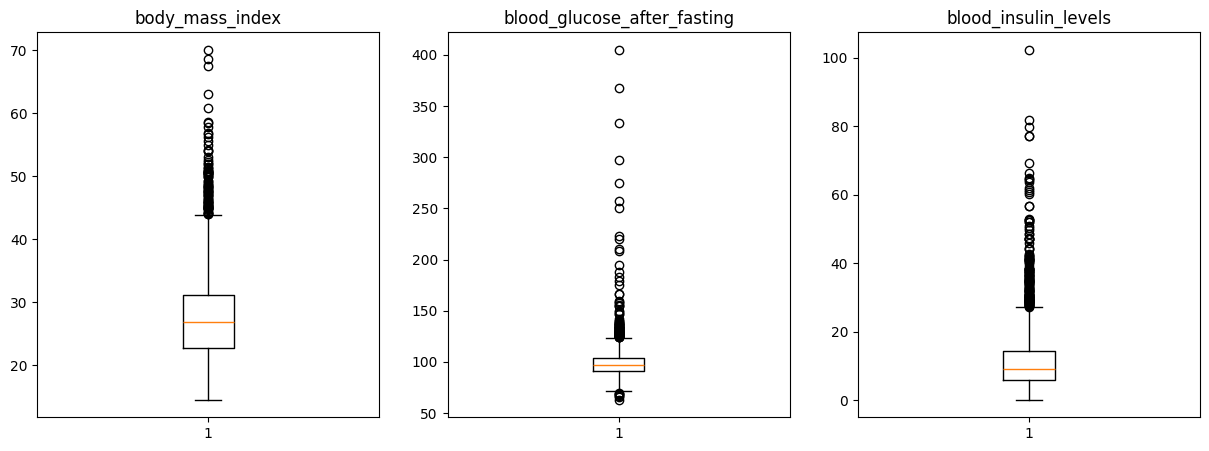


Resumen estadístico en la Columna body_mass_index antes de la Eliminación :
count    2278.000000
mean       27.955180
std         7.248962
min        14.500000
25%        22.800000
50%        26.800000
75%        31.200000
max        70.100000
Name: body_mass_index, dtype: float64

Resumen estadístico en la Columna body_mass_index después de la Eliminación :
count    2190.000000
mean       27.073790
std         5.775824
min        14.500000
25%        22.700000
50%        26.600000
75%        30.600000
max        43.800000
Name: body_mass_index, dtype: float64


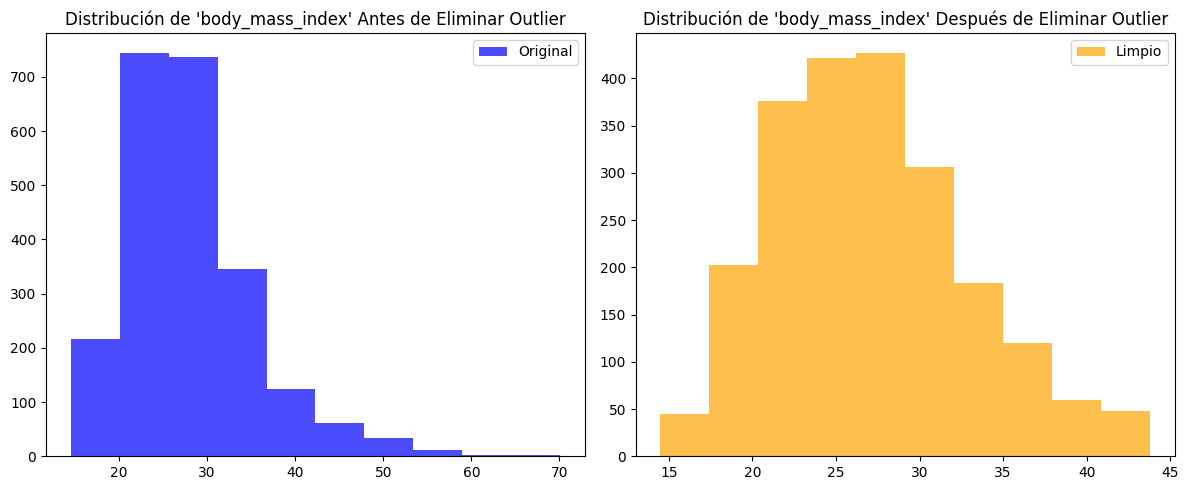

Text(0.5, 1.0, 'Limpia')

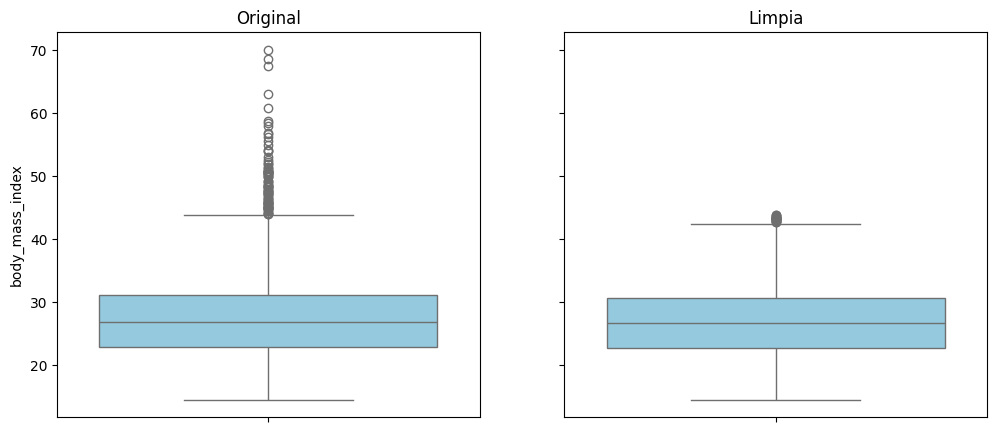

In [ ]:
# ---------------------------------Inicio información DATASET Age National ---------------------------------------------
# Obtener información general del dataset
print("Información del dataset Age National:")
print(df.info())

# Verificar datos faltantes en cada columna
faltantes = df.isnull().sum()
print("\nDatos faltantes por columna:")
print(faltantes)

# Manejo de duplicados
duplicados = df.duplicated().sum()
if duplicados > 0:
  df.drop_duplicates(inplace=True)
  print("\nNúmero de filas duplicadas:", duplicados)
else:
  print("\nNo hay filas duplicadas en el dataset.")

# Obtener estadísticas descriptivas básicas para ver distribución y rangos
print("\nEstadísticas descriptivas:")
print(df.describe())

# ---------------------------------Fin DATASET Age National ---------------------------------------------
# ---------------------------------Inicio información DATASET CDC ---------------------------------------------
# Obtener información general del dataset
print("\nInformación del dataset de la CDC:")
print(df_cdc.info())

# Verificar datos faltantes en cada columna
faltantes = df_cdc.isnull().sum()
print("\nDatos faltantes por columna:")
print(faltantes)

# Manejo de duplicados
duplicados = df_cdc.duplicated().sum()
if duplicados > 0:
  df_cdc.drop_duplicates(inplace=True)
  print("\nNúmero de filas duplicadas:", duplicados)
else:
  print("\nNo hay filas duplicadas en el dataset.")

# Obtener estadísticas descriptivas básicas para ver distribución y rangos
print("\nEstadísticas descriptivas:")
print(df_cdc.describe())

# ---------------------------------Fin DATASET CDC ---------------------------------------------
# Conversión de tipos de datos, solo Body Mass Index y Blood Insulin Levels
# Reemplazamos también la coma por un punto
df['Body Mass Index'] = pd.to_numeric(df['Body Mass Index'].str.replace(',', '.'), errors='coerce')
df['Blood Insulin Levels'] = pd.to_numeric(df['Blood Insulin Levels'].str.replace(',', '.'), errors='coerce')

# Transformación a variables categóricas
df['PAQ605'] = df['PAQ605'].astype('category')
df['Diabetic or not'] = df['Diabetic or not'].astype('category')
df['Age_group'] = df['Age_group'].astype('category')

# Renombrar las categorías utilizando cat.rename_categories
df['PAQ605'] = df['PAQ605'].cat.rename_categories({1: 'Yes', 2: 'No', 7: 'Refused', 9: "Don't know"})
df['Diabetic or not'] = df['Diabetic or not'].cat.rename_categories({1: 'Yes', 2: 'No', 3: 'Prediabetes'})
df['Age_group'] = df['Age_group'].cat.rename_categories({'children': 'Children'})

# Nueva variable de Edad en meses
df['Age_in_months'] = df['Age'] * 12 + 0.5 # Se agrega 0.5 para igualarlo al dataset de la CDC

# DataFrame con solo las columnas necesarias para clasificación
df_cdc = df_cdc[['sex', 'agemos', 'P5', 'P85', 'P95', 'pct120ofP95']]

# Incorporación del DataSet y las columnas del DataSet de la CDC en uno
df_fusion = pd.merge(df, df_cdc, left_on=['Age_in_months', 'Gender'], right_on=['agemos', 'sex'], how='left')

# Función para clasificar el BMI usando los puntos de referancia del CDC
def categorize_bmi_cdc(row):
    bmi = row['Body Mass Index']
    age_group = row['Age_group']
    if age_group == 'Children':
    # Se verifica que existan los datos CDC necesarios
      if pd.isnull(row['P5']) or pd.isnull(row['P85']) or pd.isnull(row['P95']) or pd.isnull(row['pct120ofP95']):
        return "Sin datos CDC"
      if bmi < row['P5']:
          return "Underweight"
      elif bmi < row['P85']:
          return "Healthy"
      elif bmi < row['P95']:
          return "Overweight"
      elif bmi < row['pct120ofP95']:
          return "Obesity"
      else:
          return "Severe Obesity"
    else:
      if bmi < 18.5:
          return "Underweight"
      elif bmi >=18.5 and bmi < 24.9:
          return "Healthy"
      elif bmi >=25 and bmi < 29.9:
          return "Overweight"
      elif bmi >=30 and bmi < 39.9:
          return "Obesity"
      else:
          return "Severe Obesity"

# Aplicar la función para crear una nueva columna de clasificación del BMI según la CDC
df['BMI_category'] = df_fusion.apply(categorize_bmi_cdc, axis=1)

# Transformamos despues de hacer la fusion de columnas y clasificación del BMI
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.rename_categories({1: 'Male', 2: 'Female'})

# Nueva variable para categorizar la glucosa
df['Glucose_category'] = pd.cut(df['Blood Glucose after fasting'], bins=[0, 99, 125, df['Blood Glucose after fasting'].max()],
                                labels=['Normal', 'Prediabetes', 'Diabetes'])

print('\n*******************************************************************\n')

# Normalizacion de columnas
print("\nColumnas originales:\n", df.columns)
# Convierte a minúsculas y reemplaza espacios con guión bajo
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Imprimir los nuevos nombres de las columnas
print("\nNuevos nombres en minúsculas y con guión bajo:\n", df.columns)

print('\n*******************************************************************\n')

print('\n Verificación de datos:\n', df.head())

print('\n*******************************************************************\n')

print("\nInformación del dataset despues de preprocesamiento:")
print(df.info())

print('\n*******************************************************************\n')

print("\nEstadísticas descriptivas:\n")
print(df.describe())

# Detección de outliers con boxplot
randframe = df[['body_mass_index', 'blood_glucose_after_fasting', 'blood_insulin_levels']]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(randframe.columns):
    ax[i].boxplot(df[col].dropna())
    ax[i].set_title(col)
plt.show()

#imprimir las estadísticas del conjunto original
print("\nResumen estadístico en la Columna body_mass_index antes de la Eliminación :")
print(randframe['body_mass_index'].describe())

# Identificación por medio del método IQR
Q1 = randframe['body_mass_index'].quantile(0.25)
Q3 = randframe['body_mass_index'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

#Obtiene un conjunto
rd_no_outliers = randframe[(randframe['body_mass_index'] >= lower_bound) & (randframe['body_mass_index'] <= upper_bound)].copy()

# Imprime el resumen estadísticos después de eliminar los outliers
print("\nResumen estadístico en la Columna body_mass_index después de la Eliminación :")
print(rd_no_outliers['body_mass_index'].describe())

# Gráfica de las distribuciones después del manejo de ouliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribución de 'body_mass_index' Antes de Eliminar Outlier")
plt.hist(randframe['body_mass_index'], bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribución de 'body_mass_index' Después de Eliminar Outlier")
plt.hist(rd_no_outliers['body_mass_index'], bins=10, color='orange', alpha=0.7, label='Limpio')
plt.legend()

plt.tight_layout()
plt.show()


# Diagrama de Cajas antes y después

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(y=randframe['body_mass_index'], ax=axes[0], color='skyblue')
axes[0].set_title('Original')

sns.boxplot(y=rd_no_outliers['body_mass_index'], ax=axes[1], color='skyblue')
axes[1].set_title('Limpia')